In [1]:
from sklearn.datasets import fetch_kddcup99
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the python libraries to create/connect to a Spark Session
from pyspark.sql import SparkSession

# build a SparkSession 
#   connect to the master node on the port where the master node is listening (7077)
#   declare the app name 
#   configure the executor memory to 512 MB
#   either *connect* or *create* a new Spark Context
spark = SparkSession.builder \
    .master("spark://spark-master:7077")\
    .appName("My first spark application")\
    .config("spark.executor.memory", "512m")\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/11 15:51:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# create a spark context
sc = spark.sparkContext

In [10]:
data = fetch_kddcup99(return_X_y = True)

In [11]:
len(data[0])

494021

In [12]:
x= data[0]

In [13]:
x = x[:, 4:]

In [14]:
y = data[1] 

In [15]:
for i in range (x.shape[1]):
    print(len(np.unique(x[:, i])))


3300
10725
2
3
4
22
6
2
23
2
3
20
18
3
7
1
1
2
490
470
92
51
77
51
99
78
64
256
256
101
101
101
65
100
72
101
101


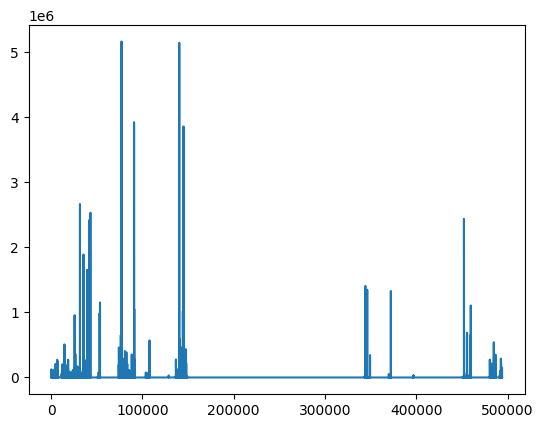

In [16]:
plt.plot(x[:,1])

In [17]:
# to delete later on
subLen = 1000
x = x[:subLen,]
y = y[:subLen]

In [20]:
kTarget = len(set(y))
nSamples = x.shape[0]
print(kTarget)

2


In [21]:
nSlice = None
xRdd = sc.parallelize([{"x": x[i], "c": None,"y": y[i]} for i in range(nSamples)], numSlices = nSlice)
# add persist later on

In [22]:
xRdd.getNumPartitions() # check partitions

2

In [23]:
def minmaxRescale(datum, minS, maxS):
    mask = (minS < maxS).astype(bool)
    feature = datum["x"] 
    feature = (feature[mask] - minS[mask])/(maxS[mask] - minS[mask])
    return {"x": feature, "y": datum["y"]}    
    

In [24]:
%%time
maxS = xRdd.map(lambda datum: datum["x"])\
           .reduce(lambda a, b: np.maximum(a, b))

minS = xRdd.map(lambda datum: datum["x"])\
           .reduce(lambda a, b: np.minimum(a, b))

CPU times: user 16.7 ms, sys: 1.86 ms, total: 18.6 ms
Wall time: 1.08 s


In [25]:
#### fix ####
# %%time
# results = xRdd.map(lambda datum: datum["x"])\
#               .reduce(lambda a, b: (np.maximum(a[0], b[0]), np.minimum(a[1], b[1]))

In [26]:
xRdd = xRdd.map(lambda datum: minmaxRescale(datum, minS, maxS))

In [27]:
def selectCluster(datum, C):
    """
    dimC(k, len(datum))
    """
    distances = np.sum((datum["x"] - C)**2, axis=1) 
    clusterId = np.argmin(distances)
    datum["c"] = clusterId
    
    return (datum)

In [15]:
def kMeans(xRdd, C, maxIterations):
    for t in range(maxIterations):
        CIdS = xRdd.map(lambda datum: selectCluster(datum, C))

        
                   .

IndentationError: unexpected indent (3135065996.py, line 6)

In [ ]:
def localK